In [32]:
import datasets

dataset = datasets.load_dataset("../../datasets/ShareGPT",data_files="ShareGPT_V4.3_unfiltered_cleaned_split.json")

In [33]:
def extract_human_turns(example):
    # 提取所有 human 对话的 value 值
    human_turns = [
        msg["value"] for msg in example["conversations"] 
        if msg["from"] == "human"
    ]
    return {"turns": human_turns}

# 应用处理函数并添加新列
dataset = dataset.map(extract_human_turns)

In [34]:
dataset["train"].select(range(10))[:]

{'id': ['QWJhYvA_0',
  'i6IyJda_0',
  'A5AbcES_0',
  'hRPPgZT_0',
  'hRPPgZT_11',
  'IWkMGRK_0',
  'DhelrJT_0',
  'H1aZlSE_0',
  'wNBG8Gp_0',
  'wNBG8Gp_15'],
 'conversations': [[{'from': 'human',
    'markdown': None,
    'text': None,
    'value': "Summarize the main ideas of Jeff Walker's Product Launch Formula into bullet points as it pertains to a growth marketing agency implementing these strategies and tactics for their clients..."},
   {'from': 'gpt',
    'markdown': None,
    'text': None,
    'value': "Here are the main ideas of Jeff Walker's Product Launch Formula that can be applied by a growth marketing agency for their clients:\n\n1. Identify the target audience and their needs: Understand the ideal customer for the product or service, and create a messaging that resonates with them.\n2. Pre-launch: Build anticipation and excitement for the launch by creating buzz, gathering testimonials and case studies, and using social media to create awareness.\n3. Launch: Use a well-

In [35]:
dataset = dataset.filter(lambda x: len(x["turns"]) > 0)

In [36]:
dataset["train"].select(range(1))[0]

{'id': 'QWJhYvA_0',
 'conversations': [{'from': 'human',
   'markdown': None,
   'text': None,
   'value': "Summarize the main ideas of Jeff Walker's Product Launch Formula into bullet points as it pertains to a growth marketing agency implementing these strategies and tactics for their clients..."},
  {'from': 'gpt',
   'markdown': None,
   'text': None,
   'value': "Here are the main ideas of Jeff Walker's Product Launch Formula that can be applied by a growth marketing agency for their clients:\n\n1. Identify the target audience and their needs: Understand the ideal customer for the product or service, and create a messaging that resonates with them.\n2. Pre-launch: Build anticipation and excitement for the launch by creating buzz, gathering testimonials and case studies, and using social media to create awareness.\n3. Launch: Use a well-crafted launch sequence to maximize sales and conversions. This can include offering bonuses, creating scarcity, and using a deadline to create urg

In [37]:
dataset = dataset.remove_columns(column_names="conversations")

In [38]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'turns'],
        num_rows: 68623
    })
})

In [25]:
length_list = [len(x['turns']) for x in dataset["train"]]

/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1156994/3411359984.py:50: UserWarning: Glyph 24067 (\N{CJK UN

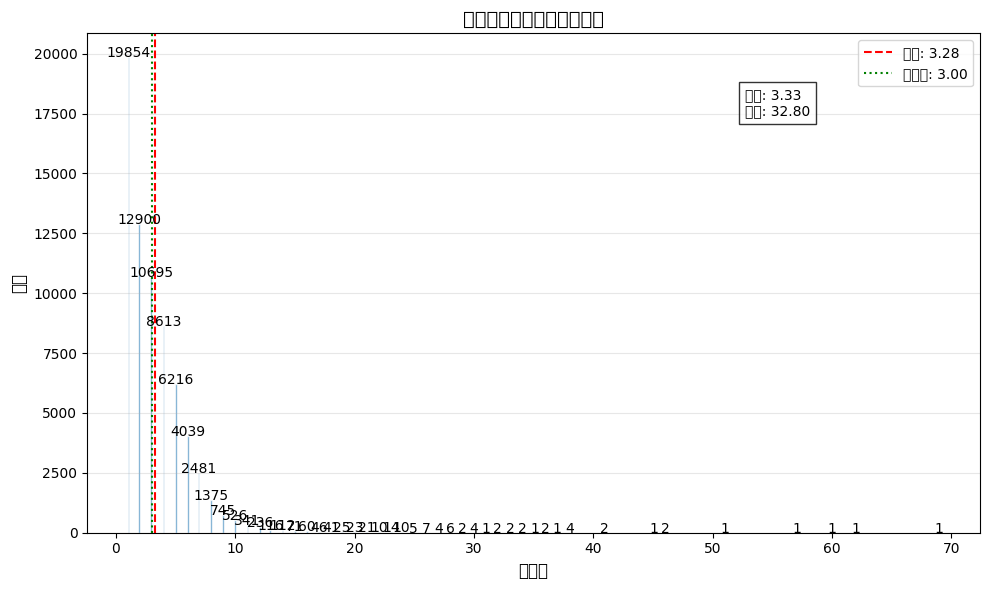

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 假设您的长度列表为 length_list
# length_list = [...]  # 替换为您的实际数据

# 1. 计算统计量
mean = np.mean(length_list)
median = np.median(length_list)
# mode_result = stats.mode(length_list)  # 获取 ModeResult 对象
# mode = mode_result.mode[0]  # 正确获取众数的方式

# 2. 自动确定最优bin数量
bin_choice = 'auto'  # 可选：'fd', 'sturges', 'sqrt', 'doane'等
bins = np.histogram_bin_edges(length_list, bins=bin_choice)

# 3. 绘制增强版直方图
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    length_list, 
    bins=bins,
    color='#1f77b4',
    edgecolor='white',
    density=False,  # 改为True可显示概率密度
    alpha=0.75
)

# 4. 添加统计标注
plt.axvline(mean, color='red', linestyle='--', label=f'均值: {mean:.2f}')
plt.axvline(median, color='green', linestyle=':', label=f'中位数: {median:.2f}')
# plt.axvline(mode, color='purple', linestyle='-.', label=f'众数: {mode:.2f}')

# 5. 添加数值标签
for i in range(len(patches)):
    if n[i] > 0:  # 只显示非零频次的标签
        plt.text(
            patches[i].get_x() + patches[i].get_width()/2,
            patches[i].get_height()+0.5,
            int(n[i]),
            ha='center'
        )

# 6. 图表装饰
plt.xlabel('长度值', fontsize=12)
plt.ylabel('频次', fontsize=12)
plt.title('长度分布直方图（优化版）', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# 7. 显示偏度和峰度
skew = stats.skew(length_list)
kurt = stats.kurtosis(length_list)
plt.figtext(0.75, 0.8, f"偏度: {skew:.2f}\n峰度: {kurt:.2f}", 
            bbox={'facecolor':'white', 'alpha':0.8})

plt.show()

In [39]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'turns'],
        num_rows: 68623
    })
})

In [40]:
dataset.save_to_disk("../../datasets/ShareGPT-filtered")

Saving the dataset (0/1 shards):   0%|          | 0/68623 [00:00<?, ? examples/s]

In [8]:
import datasets
# select 1000 to save
dataset = datasets.load_from_disk("../../datasets/ShareGPT-filtered")

In [91]:
# 清洗数据，保留turns长度小于等于2，且turns中的文本长度小于1600的样本
def clean_data(example):
    return len(example["turns"]) == 2 and all(len(turn) < 1000 for turn in example["turns"]) and all(len(turn) > 10 for turn in example["turns"])

dataset = dataset.filter(clean_data)

Filter:   0%|          | 0/9947 [00:00<?, ? examples/s]

In [99]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'turns'],
        num_rows: 9419
    })
})

In [82]:
# 统计turns长度和每个turn的长度
turns_lengths = [len(turns) for turns in dataset["train"]["turns"]]
turns_text_lengths = [[len(turn) for turn in turns] for turns in dataset["train"]["turns"]]

In [94]:
# 读取jsonl，统计Turn中每个turn的长度
import json

file = "../eagle/data/shareGPT/question.jsonl"

with open(file, 'r', encoding='utf-8') as f:
    lines = f.readlines()
turns_lengths_jsonl = []
turns_text_lengths_jsonl = []
for line in lines:
    data = json.loads(line)
    turns_lengths_jsonl.append(len(data["turns"]))
    turns_text_lengths_jsonl.extend([len(turn) for turn in data["turns"]])


In [75]:
turns_lengths_jsonl

[1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,


In [95]:
turns_text_lengths_jsonl.sort(reverse=True)

In [98]:
turns_text_lengths_jsonl

[998,
 998,
 997,
 996,
 995,
 994,
 994,
 994,
 993,
 991,
 990,
 989,
 989,
 988,
 986,
 986,
 985,
 984,
 984,
 983,
 983,
 982,
 982,
 982,
 982,
 980,
 980,
 977,
 976,
 976,
 974,
 974,
 973,
 973,
 972,
 972,
 972,
 971,
 968,
 967,
 967,
 967,
 964,
 964,
 963,
 963,
 963,
 963,
 962,
 962,
 962,
 962,
 961,
 961,
 960,
 960,
 960,
 960,
 958,
 958,
 958,
 958,
 958,
 958,
 958,
 957,
 955,
 955,
 954,
 954,
 953,
 951,
 947,
 946,
 944,
 944,
 942,
 941,
 941,
 938,
 938,
 938,
 938,
 937,
 936,
 936,
 935,
 935,
 935,
 935,
 935,
 934,
 933,
 933,
 932,
 932,
 930,
 930,
 929,
 929,
 929,
 929,
 927,
 926,
 925,
 925,
 924,
 923,
 922,
 922,
 922,
 922,
 921,
 918,
 918,
 918,
 918,
 917,
 917,
 917,
 917,
 916,
 916,
 916,
 914,
 914,
 913,
 911,
 910,
 910,
 910,
 910,
 909,
 908,
 908,
 907,
 907,
 907,
 906,
 905,
 904,
 904,
 903,
 902,
 902,
 900,
 900,
 899,
 897,
 897,
 896,
 896,
 894,
 894,
 894,
 894,
 893,
 892,
 890,
 890,
 890,
 889,
 889,
 889,
 889,
 885,
 885

In [89]:
# 读取jsonl，统计Turn中每个turn的长度
import json

file = "../eagle/data/mt_bench/question.jsonl"

with open(file, 'r', encoding='utf-8') as f:
    lines = f.readlines()
turns_lengths_jsonl = []
turns_text_lengths_jsonl = []
for line in lines:
    data = json.loads(line)
    turns_lengths_jsonl.append(len(data["turns"]))
    turns_text_lengths_jsonl.extend([len(turn) for turn in data["turns"]])


In [77]:
turns_lengths_jsonl

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [78]:
turns_text_lengths_jsonl.sort(reverse=True)

In [79]:
turns_text_lengths_jsonl

[1642,
 1556,
 1237,
 1117,
 1044,
 1028,
 862,
 758,
 742,
 684,
 672,
 541,
 519,
 517,
 511,
 450,
 450,
 410,
 385,
 365,
 334,
 319,
 317,
 317,
 296,
 294,
 292,
 258,
 257,
 250,
 245,
 241,
 240,
 237,
 226,
 223,
 221,
 219,
 219,
 216,
 210,
 209,
 192,
 189,
 186,
 186,
 183,
 179,
 179,
 178,
 176,
 175,
 170,
 170,
 169,
 166,
 163,
 163,
 155,
 141,
 140,
 135,
 135,
 133,
 132,
 131,
 127,
 126,
 126,
 125,
 123,
 121,
 121,
 118,
 114,
 113,
 113,
 112,
 111,
 110,
 110,
 109,
 109,
 107,
 107,
 105,
 103,
 103,
 102,
 101,
 100,
 99,
 97,
 97,
 95,
 94,
 93,
 93,
 92,
 92,
 92,
 91,
 89,
 85,
 85,
 84,
 83,
 83,
 82,
 79,
 78,
 77,
 77,
 77,
 76,
 73,
 73,
 72,
 72,
 71,
 69,
 69,
 68,
 68,
 68,
 68,
 66,
 65,
 64,
 63,
 62,
 62,
 62,
 61,
 61,
 60,
 58,
 57,
 57,
 54,
 54,
 53,
 52,
 51,
 51,
 49,
 47,
 45,
 44,
 42,
 38,
 38,
 32,
 32,
 30,
 26,
 24,
 23,
 23,
 16]

In [101]:
dataset = dataset["train"].shuffle(seed=42).select(range(1000))

In [103]:
import json

output_file = "../eagle/data/shareGPT/question.jsonl"

# Process and write to JSONL
with open(output_file, "w", encoding="utf-8") as f_out:
    for idx, example in enumerate(dataset):
        json.dump({
            "question_id": idx,
            "turns":  example["turns"],
        }, f_out, ensure_ascii=True)
        f_out.write("\n")